# Final Project: Tides
**ASTR19** - Practical Programming for the Sciences <br>
Elias, Emerson, Logan, and Onat

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize
from scipy import interpolate
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
tidedata = "ASTR19_F23_group_project_data.txt"
filein = open(tidedata,"r")
content = filein.readlines()

### Part 1

#### Intra-Day Graph

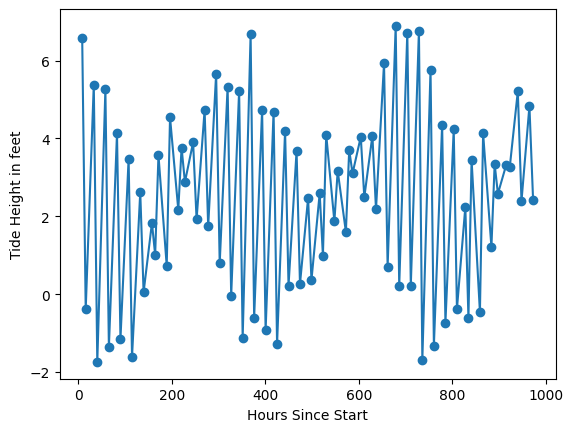

In [3]:
#--------------------------------------------------------Concept Setup----------------------------------------------------------
y = []
x = []
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:

for i in range(82):
    x.append( list2[i] +hours[i] + mins_converted[i])


plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel('Hours Since Start')
plt.ylabel('Tide Height in feet')

plt.show()

#### Inter-Day Graph

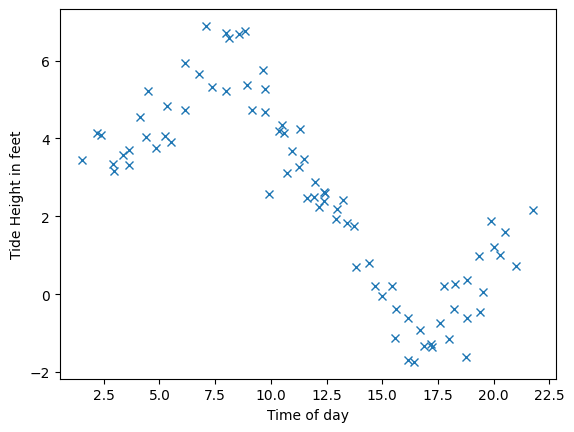

In [4]:
#--------------------------------------------------------Copy of Concept Setup----------------------------------------------------------
            # Putting the "Concept Setup" inside the graphing cell is required in order to circomvent a bug
            #The bug stopped the graphing portion from graphing unless the 'Concept Setup' was just ran. 
y = []
x = []
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


#Inter-day graph will give a compulation of all the tide hights per day
#The stucture needed to build this graph is already setup.

for i in range(82):
    x.append(hours[i] + mins_converted[i])
    #The only different between the intra-day graph and the inter-day graph, is that Inter-day graph does not count days

plt.plot(x,y,'x')

plt.xlabel('Time of day')
plt.ylabel('Tide Height in feet')  

plt.show()

### Part 2

#### Inter-Day Graph (with curvefit)

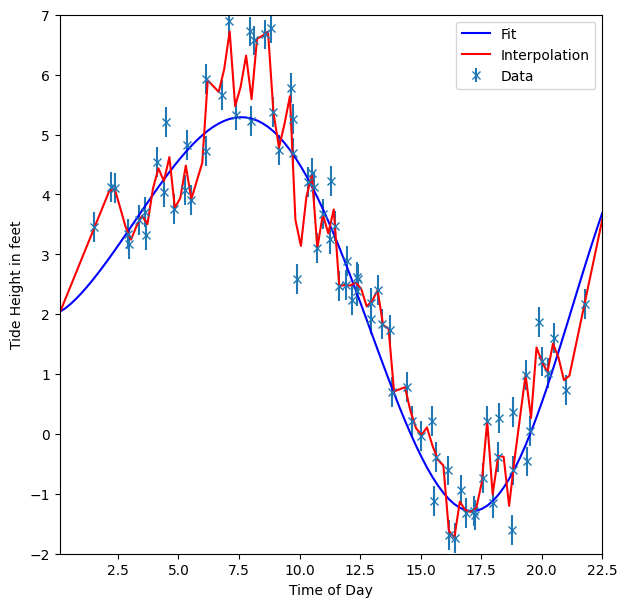

In [5]:
#--------------------------------------------------------Copy of Concept Setup----------------------------------------------------------
            # Putting the "Concept Setup" inside the graphing cell is required in order to circomvent a bug
            #The bug stopped the graphing portion from graphing unless the 'Concept Setup' was just ran. 
y = []
x = []
y_err = 0.25 #might be an error point bc idk what float32 does exactily
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


#Inter-day graph will give a compulation of all the tide hights per day
#The stucture needed to build this graph is already setup.

for i in range(82):
    x.append(hours[i] + mins_converted[i])
    #The only different between the intra-day graph and the inter-day graph, is that Inter-day graph does not count days

#-----------------------------Best Fit Line----------------------------------

# create a function that for a given time(in hours), comoputes a hight using linear interpolation
hight_interpol = interpolate.interp1d(x, y, kind = 'linear', fill_value = 'extrapolate')

#define the fit model
def hight_model(x_1, a, b, c, d):
    return a*np.sin(((x_1**b)/c) + d) + 2

#preform the fit
params, params_cov = optimize.curve_fit(hight_model, x, y, p0 = [3, 1, 5, 0], bounds=([-5,0,-10,0],[5,2,10,3]))   #Stearting parameters for a, b, c, and d

# define the error array
param_err = np.sqrt(np.diag(params_cov))

#use the fitted parameters to define a best-fit function
def hight_fit(x_1):
    return hight_model(x_1, params[0], params[1], params[2], params[3])
# alternarively hight model(hours, **params)

n = 100
test_hours = np.linspace(0.1, 22.5, n)  
#make a guess using interpolator
test_hight_int = hight_interpol(test_hours)            # Maybe an Error point
#make a guess using best fit func
test_hight_fit = hight_fit(test_hours)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

#-------------------------------------------------------plot data--------------------------------------

ax.errorbar(x, y, y_err, fmt='x', label = 'Data')
ax.plot(test_hours, hight_fit(test_hours), 'b-', label = 'Fit')
ax.plot(test_hours, test_hight_int, 'r-', label = 'Interpolation')

ax.set_xlabel('Time of Day')
ax.set_ylabel('Tide Height in feet')
ax.legend(loc = 0)
ax.set_ylim(-2, 7)
ax.set_xlim(0.1, 22.5)
  
plt.savefig('Inter-day', dpi=200)
plt.show()


#### Intra-Day Graph (with curvefit)

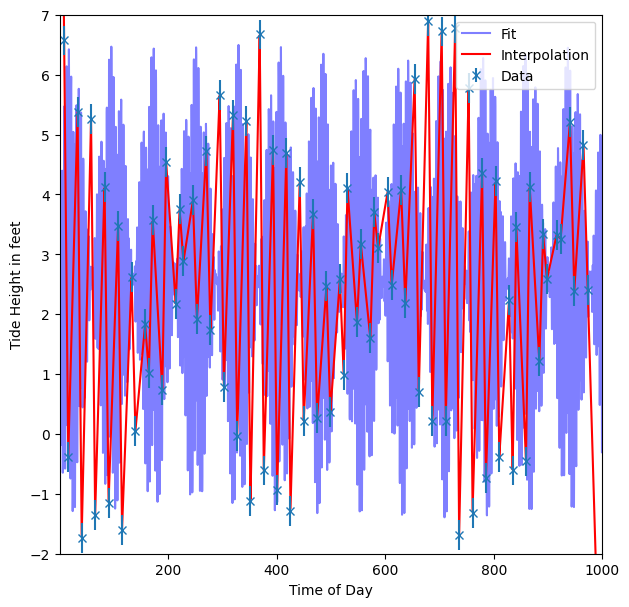

In [6]:
#--------------------------------------------------------Concept Setup----------------------------------------------------------
y = []
x = []
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row = content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


for i in range(82):
    x.append( list2[i] +hours[i] + mins_converted[i])

#-----------------------------Best Fit Line----------------------------------

# create a function that for a given time(in hours), comoputes a hight using linear interpolation
hight_interpol = interpolate.interp1d(x, y, kind = 'linear', fill_value = 'extrapolate')

#define the fit model
def hight_model(x_1, a, b, c, d, e, f, g, h):
    return a*(np.sin((x_1*b)+c)*(np.sin((x_1*d)+e)*np.sin((x_1*f)+g))) + h

#preform the fit
params, params_cov = optimize.curve_fit(hight_model, x, y, p0 = [2, 1, 1, 1, 1, 1, 1, 2.5])   #Stearting parameters for a, b, c, and d

# define the error array
param_err = np.sqrt(np.diag(params_cov))

#use the fitted parameters to define a best-fit function
def hight_fit(x_1):
    return hight_model(x_1, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7])
# alternarively hight model(hours, **params)

n = 5000
test_hours = np.linspace(0.1, 1000, n)  
#make a guess using interpolator
test_hight_int = hight_interpol(test_hours)            # Maybe an Error point
#make a guess using best fit func
test_hight_fit = hight_fit(test_hours)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)

#-------------------------------------------------------plot data--------------------------------------
ax.plot(test_hours, hight_fit(test_hours), 'b-', alpha=0.5, label = 'Fit')
ax.plot(test_hours, test_hight_int, 'r-', label = 'Interpolation')
ax.errorbar(x, y, y_err, fmt='x', label = 'Data')

ax.set_xlabel('Time of Day')
ax.set_ylabel('Tide Height in feet')
ax.legend(loc = 0)
ax.set_ylim(-2, 7)
ax.set_xlim(0.1, 1000)
  
plt.savefig('Intra-day', dpi=200)
plt.show()

### Part 3

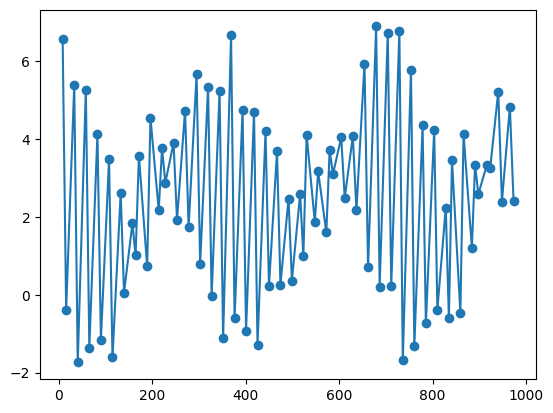

In [7]:
y = []
x = []
# create a loop that will read every line of the data and then put it into a list so that I can actully refer to the third columun and 
#add it to my y values list

for i in range(3,len(content)): 
    row =content[i].split() 
    y.append(row[2])
#turn the y values to float 
for i in range(len(y)):
    y[i]=float(y[i])

#check the work 
#print(y)
#print(len(y)) #needs to be 82
#print(type(y[5])) needs to be a float

#So successfully created a list for the y values of the data to be plotted.
#----------------------------------------------------------------------------
# Now it is time to create the x values 
#for the x values need to convert the minutes into hours
#hours part remain the same 
#convert the days into hours

colB=[]
for i in range(3,len(content)):
    row = content[i].split()
    colB.append(row[1])

hours=[]
mins_converted=[]
for i in range(len(colB)):
    a = colB[i].split(":")
    b=int(a[1])/60 #this converts the minutes into hours
    mins_converted.append(b)
    hours.append(int(a[0]))
#so  minutes are in the list denoted by mins_converted


list1=[]
#turn the days into hours

#the first loop creates a list for the day numbers
for i in range(3,len(content)):
    row1 =content[i].split()
    theday=int(row1[0])
    list1.append(theday)
#this second loop turns the days into hours
list2=[]
for i in range(len(list1)):
    list2.append((list1[i]-1)*24)

#so the days converted into hours are in the list denoted by list2
#the hours are in the list denoted by hours


#add the day, hour and minute all in unuits of hours together to get the x interval values
#finally, adding all the lists together to get the list of x values:


for i in range(82):
    x.append( list2[i] +hours[i] + mins_converted[i])


plt.plot(x,y)
plt.scatter(x,y)

plt.show()

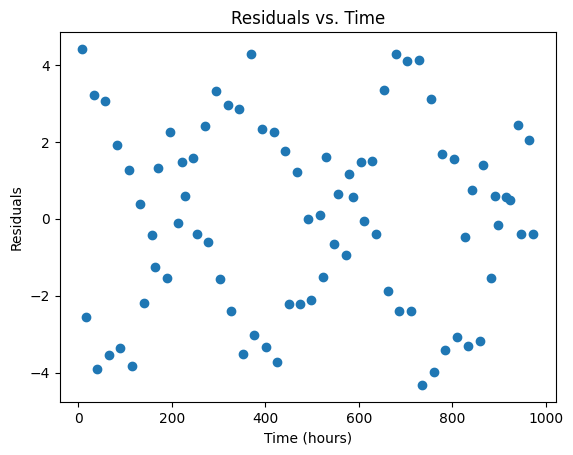

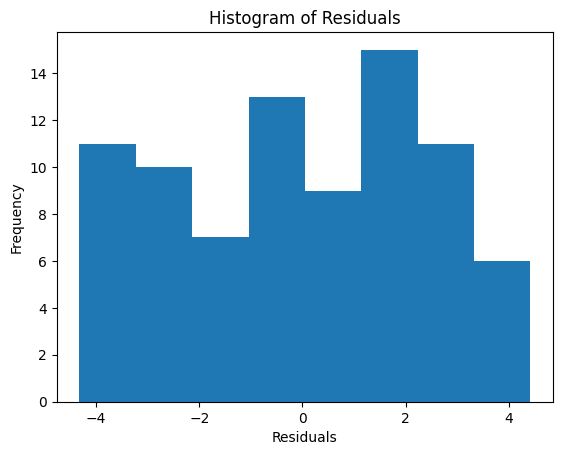

The scatter in the data is larger than the assumed experimental error.


In [8]:
#Logan -- work for question 3

def model_function(x, *params):
    x = np.array(x)  # Convert x to a NumPy array
    # Define your model using the parameters
    return params[0] * x + params[1]  # Example: Linear model y = mx + c

initial_guess = [1.0, 0.0]

params, _ = curve_fit(model_function, x, y, p0=initial_guess)

predicted_y = model_function(x, *params)
residuals = y - predicted_y

plt.figure()
plt.scatter(x, residuals)
plt.xlabel('Time (hours)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Time')
plt.show()

mean_abs_error = np.mean(np.abs(residuals))
rmse = np.sqrt(np.mean(residuals**2))
r_squared = 1 - np.sum(residuals**2) / np.sum((y - np.mean(y))**2)

# Plotting histogram of residuals
plt.figure()
plt.hist(residuals, bins='auto')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Calculating standard deviation of residuals
std_deviation = np.std(residuals)

assumed_error = 0.1  # Example assumed experimental error
if std_deviation > assumed_error:
    print("The scatter in the data is larger than the assumed experimental error.")
else:
    print("The scatter in the data is within the assumed experimental error.")

### Part 4

#### Standard Deviation for the Tsunami Outlier

In [9]:
# take the mean of tide heights
mean = np.mean(y)                      # take the mean of the tidal heights (y)
s = np.std(y)                          # take the standard deviation in tide heights (y)
#
# define the outlier for January 14
tsunami = 2.0                          # increase in high tide by ~2ft
y[26] = y[26] + tsunami
outlier = y[26]        

print(f"\nOutlier: \nTsunami high tide on January 14th = {outlier}\n")


Outlier: 
Tsunami high tide on January 14th = 7.33



In [10]:
# find SD of the outlier

def deviations(outlier,mean,s):
    # deviations: the number of standard deviations (s) that the observed outlier (outlier) is from the typical tidal pattern / mean
    d = ((outlier - mean) / s)
    return d

d = deviations(outlier,mean,s)
print(f'\nThe January 14 tsunami deviates from the model\'s mean tidal height by {d:5.4} standard deviations.\n')


The January 14 tsunami deviates from the model's mean tidal height by 2.038 standard deviations.



In [11]:
# Outlier detection using Z-score
z_scores = np.abs((y - np.mean(y)) / np.std(y))
outliers = np.array(y)[z_scores > 1.9]  # Adjusted threshold to single out the outlier

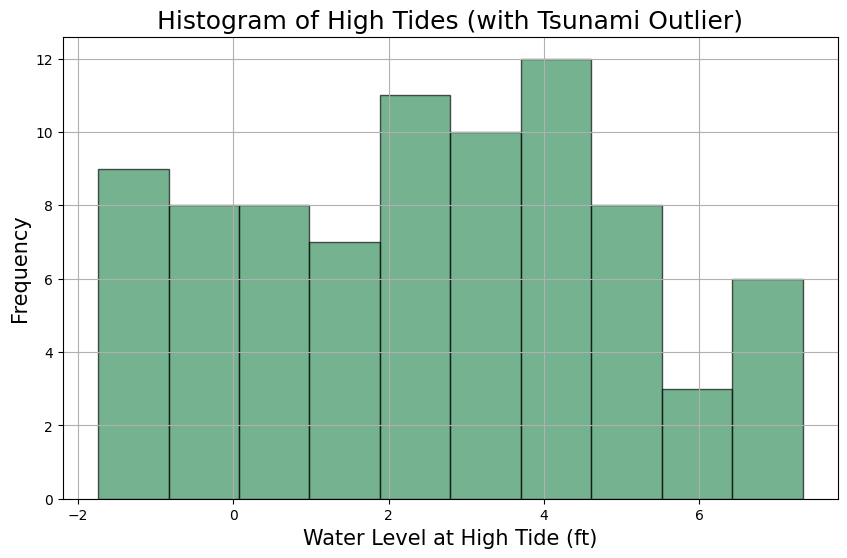


Detected Outliers: [7.33]



In [12]:
# Replot the histogram with the outlier and additional information
plt.figure(figsize=(10, 6))
plt.hist(y, bins=10, color='seagreen', alpha=0.66, edgecolor='black')
plt.xlabel('Water Level at High Tide (ft)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of High Tides (with Tsunami Outlier)', fontsize=18)
plt.grid(True)
plt.savefig("high_tide_histogram-out.png")
plt.show()

print(f"\nDetected Outliers: {outliers}\n")

In [13]:
# re-run residuals code with new y[26]
new_residuals = y - predicted_y

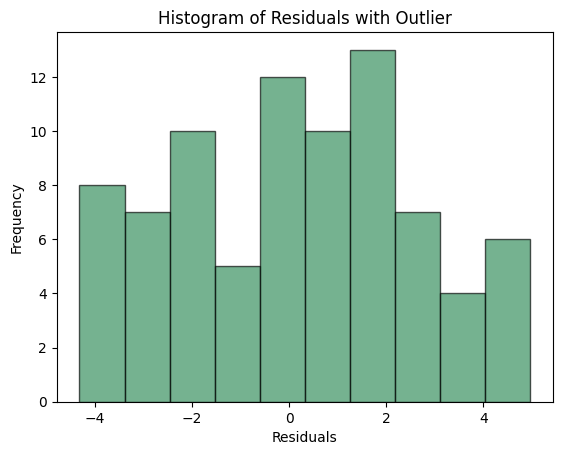

In [14]:
# Plotting histogram of residuals with new y[26]
plt.figure()
plt.hist(new_residuals, bins=10, color='seagreen', alpha=0.66, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals with Outlier')
plt.show()

#### That's all! Thank you! :)